In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["font.family"] = 'BM YEONSUNG'
#plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams["font.size"] = 10
plt.rcParams["figure.figsize"] = (5, 5)
plt.rcParams["axes.unicode_minus"] = False

In [3]:
Data=pd.read_excel("C:/Users/SAMSUNG/Desktop/세미_프로젝트2/정훈/수정데이터/빅데이터.xlsx")

In [4]:
Data.drop(columns=sum([[Data.columns[0]],list(Data.columns[-4:-2])],[]),inplace=True)

In [5]:
숙박=pd.DataFrame(Data[Data["콘텐츠분류"]=="숙박"])

In [6]:
#평점 전처리 -> 0으로 대체
print(숙박["평점"].isna().sum())
숙박["평점"].fillna(0,inplace=True)

707


In [7]:
#거리 전처리 -> 제거
print(숙박["거리(m)"].isna().sum())
temp=숙박[숙박["거리(m)"].isna()==False]

78


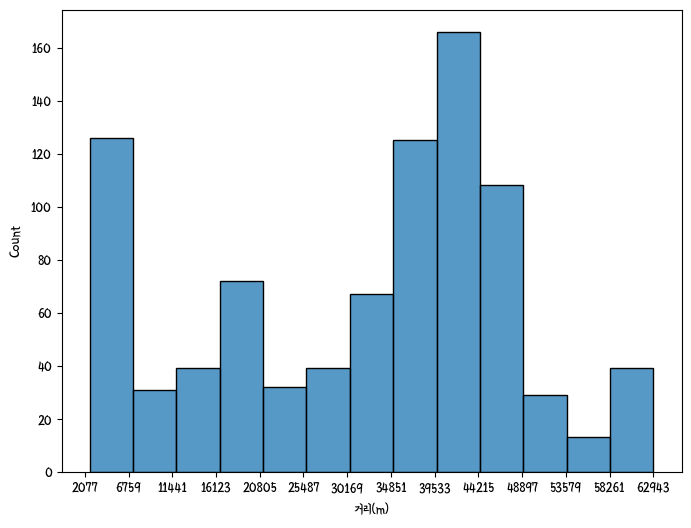

In [13]:
plt.rcParams["figure.figsize"] = (8, 6)
x,y=np.histogram(temp["거리(m)"],bins=13)
plt.figure()
sb.histplot(data=temp.loc[temp["평점"]==0,'거리(m)'],
            bins=13)
plt.xticks(y)
plt.show()

In [12]:
list(숙박["평점"].unique()).sort()

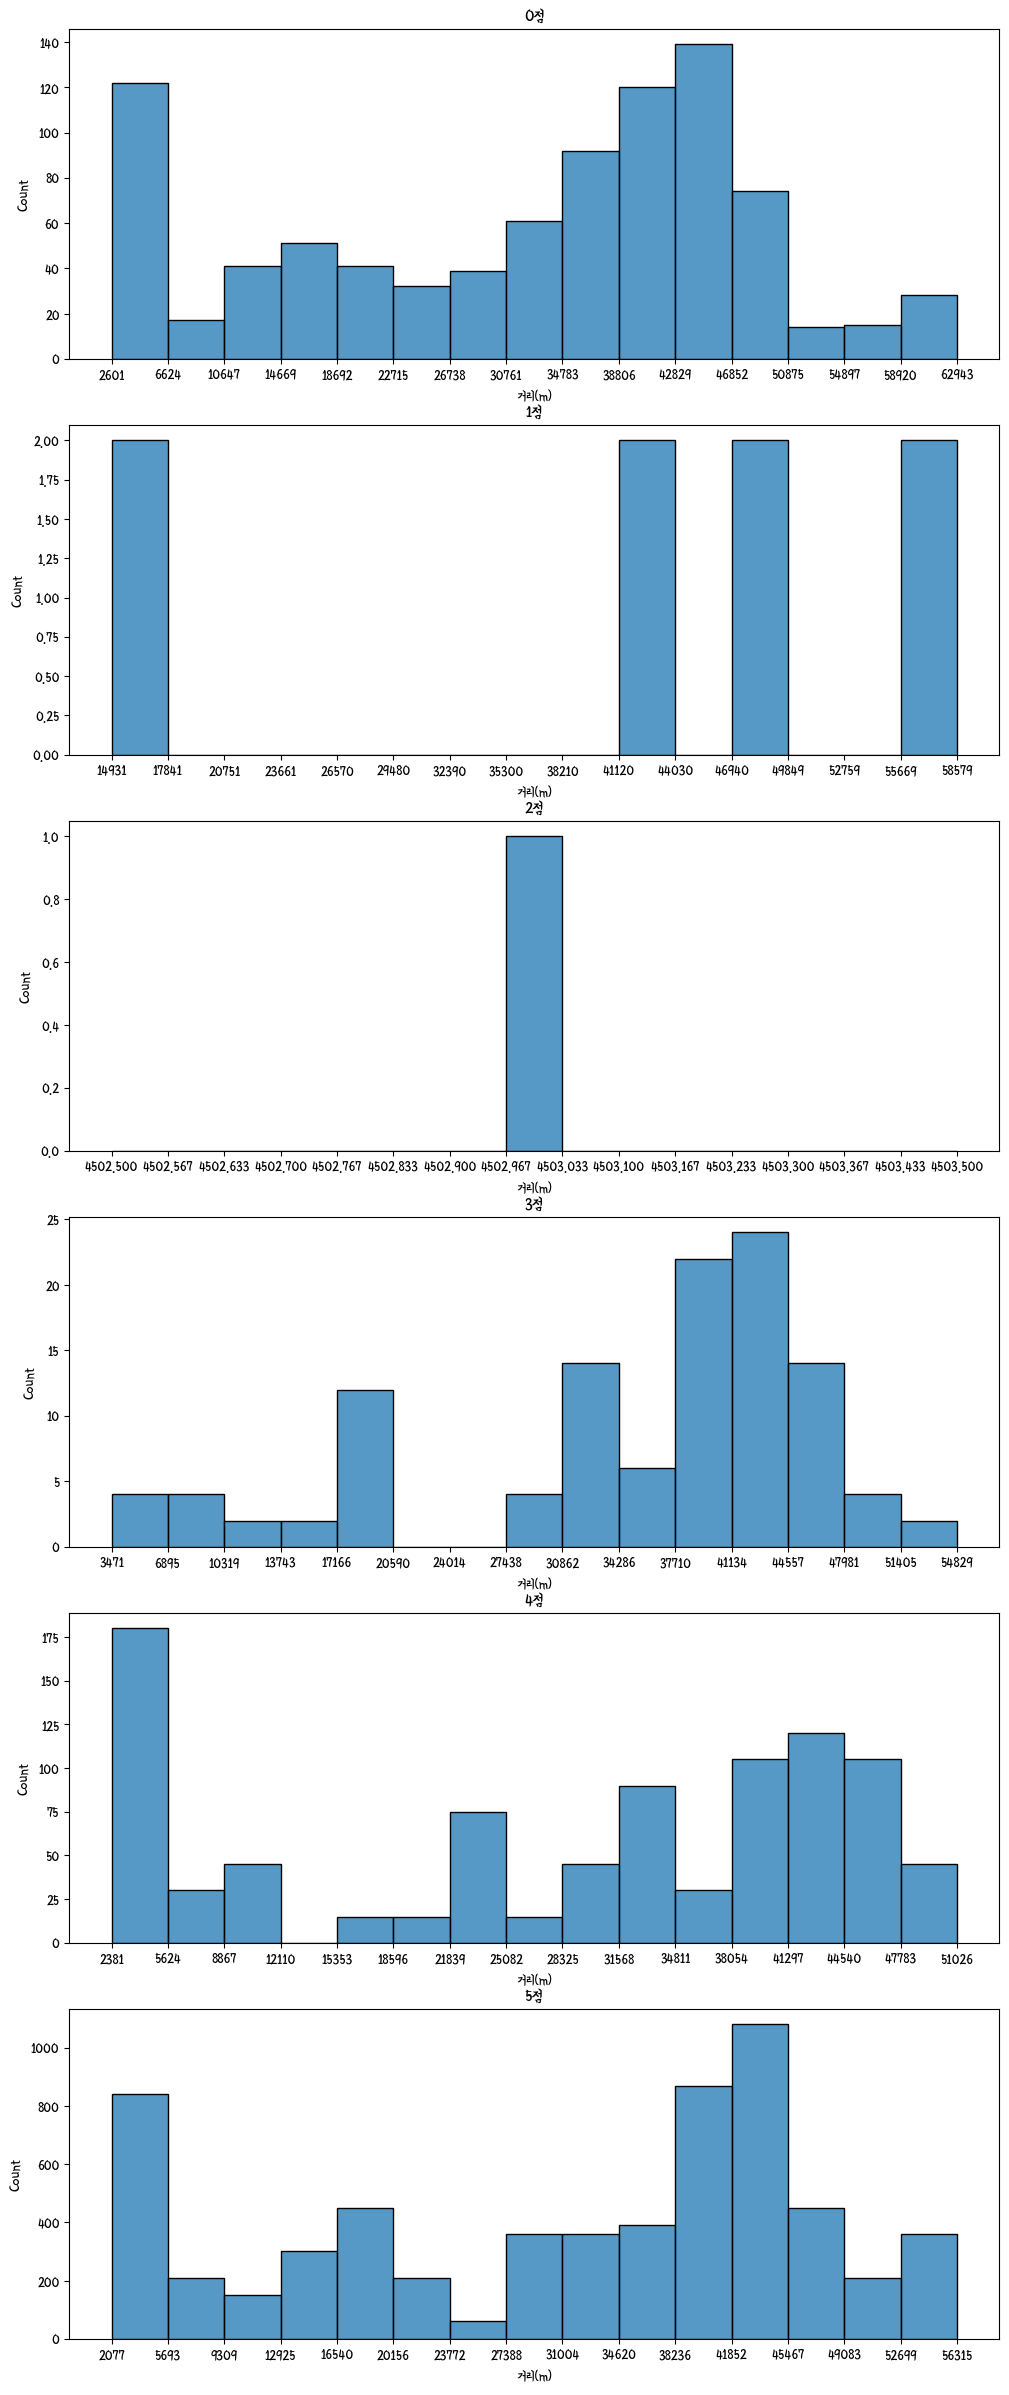

In [54]:
plt.rcParams["figure.figsize"] = (12, 30)
fig,AX=plt.subplots(6,1)
Xs=list(숙박["평점"].unique())
Xs.sort()
dt=list(AX)
#DT=[x for x in AX]
#dt=sum([[x[0],x[1]] for x in DT],[])
num=15

xt={}
for i,j in enumerate(dt):
    x,y=np.histogram(temp.loc[temp["평점"]==i,'거리(m)'],bins=num)
    sb.histplot(ax=j
        ,data=temp.loc[temp["평점"]==i,'거리(m)'],
            bins=num)
    xt[j]=y
#꾸미기#
name=dict(zip(dt,["0점","1점","2점","3점","4점","5점"]))
for z in name:
    z.title.set_text(f"{name[z]}")
    z.set_xticks(xt[z])
        # DT[y][i].set_xticks(None)
plt.show()
plt.close()